## In this version, keep the data in dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
from scipy.stats import norm,skew

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
# Take SalePrice as y, Use log of SalePrice as prediction value
y = np.log1p(df_train['SalePrice']).reset_index(drop=True)

In [4]:
column_name = list(df_train.columns)
column_name.remove('SalePrice')
print(len(column_name))
print(len(list(df_test.columns)))

80
80


In [5]:
X = pd.concat([df_train[column_name],df_test[column_name]]).reset_index(drop=True)
X.drop('Id',axis = 1,inplace=True)
X.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


### Feature analysis

In [6]:
for key,value in dict(X.isnull().sum()).items():
    if value != 0:
        print(key,value,X[key].dtype)

MSZoning 4 object
LotFrontage 486 float64
Alley 2721 object
Utilities 2 object
Exterior1st 1 object
Exterior2nd 1 object
MasVnrType 24 object
MasVnrArea 23 float64
BsmtQual 81 object
BsmtCond 82 object
BsmtExposure 82 object
BsmtFinType1 79 object
BsmtFinSF1 1 float64
BsmtFinType2 80 object
BsmtFinSF2 1 float64
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
Electrical 1 object
BsmtFullBath 2 float64
BsmtHalfBath 2 float64
KitchenQual 1 object
Functional 2 object
FireplaceQu 1420 object
GarageType 157 object
GarageYrBlt 159 float64
GarageFinish 159 object
GarageCars 1 float64
GarageArea 1 float64
GarageQual 159 object
GarageCond 159 object
PoolQC 2909 object
Fence 2348 object
MiscFeature 2814 object
SaleType 1 object


#### <font color='blue'> MSZoning
Fill null value with the most_frequent value

In [7]:
X['MSZoning'] = X['MSZoning'].fillna(X['MSZoning'].mode()[0])

#### <font color='blue'> LotFrontage
Fill null value of LotFrontage according to the neighborhood

In [8]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train[['LotFrontage','SalePrice']].corr().SalePrice

LotFrontage    0.349876
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [9]:
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### <font color='blue'> Alley

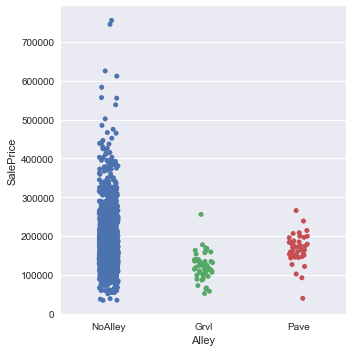

In [10]:
df_train['Alley'] = df_train['Alley'].fillna('NoAlley')
sns.catplot(x='Alley',y='SalePrice',data=df_train);

In [11]:
X['Alley'] = X['Alley'].fillna('NoAlley')

#### <font color='blue'> MasVnrType & MasVnrArea
Masonry veneer 砖石饰面.
If MasVnrType = NA, MasVnrArea = 0.
    
MasVnrType: NA with None

MasVnrArea: NA with 0.

In [12]:
X['MasVnrType'] = X['MasVnrType'].fillna('None')
X['MasVnrArea'] = X['MasVnrArea'].fillna(0)

#### <font color='blue'> BsmtQual & BsmtCond & BsmtExposure & BsmtFinType1 & BsmtFinType2 
    
Unf:Unfinish

In [13]:
X['BsmtQual'] = X['BsmtQual'].fillna('No')
X['BsmtCond'] = X['BsmtCond'].fillna('No')
X['BsmtExposure'] = X['BsmtExposure'].fillna('No')
X['BsmtFinType1'] = X['BsmtFinType1'].fillna('No')
X['BsmtFinType2'] = X['BsmtFinType2'].fillna('No')

#### <font color='blue'> Electrical
Fill null value with most_frequent value

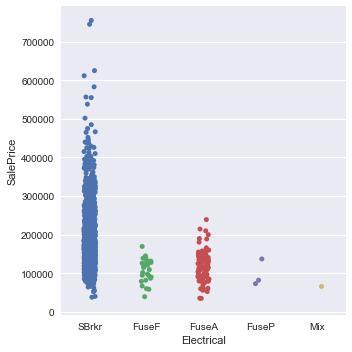

In [14]:
sns.catplot(x='Electrical',y='SalePrice',data=df_train);

In [15]:
X['Electrical'] = X['Electrical'].fillna(X['Electrical'].mode()[0])

#### <font color='blue'> FireplaceQu
FireplaceQu = null value, Fireplaces = 0,
Fill null value of FireplaceQu with 'Po'

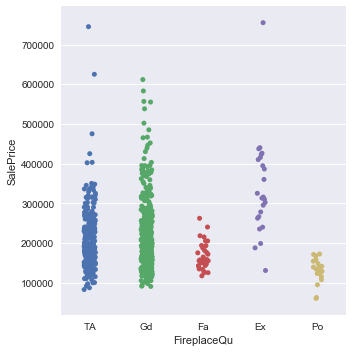

In [16]:
sns.catplot(x='FireplaceQu',y='SalePrice',data=df_train);

In [17]:
X['FireplaceQu'] = X['FireplaceQu'].fillna('Po')

#### <font color='blue'> GarageType & GarageYrBlt & GarageFinish & GarageQual & GarageCond 

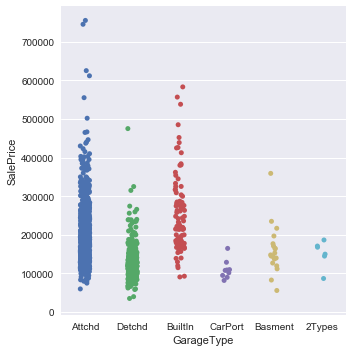

In [18]:
sns.catplot(x='GarageType',y='SalePrice',data=df_train);

In [19]:
X['GarageType'] = X['GarageType'].fillna('No')
## Which kind of value has the least influence for the data
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['GarageYrBlt'].median())
X['GarageFinish'] = X['GarageFinish'].fillna('No')
X['GarageQual'] = X['GarageQual'].fillna('No')
X['GarageCond'] = X['GarageCond'].fillna('No')

#### <font color='blue'> Simplified feature
    
+ #### <font color='green'> MiscFeature and MiscVal
MiscFeature is NA 无杂费, then MiscVal = 0. 
    
Keep MiscVal, and simplify MiscFeature as has miscellaneous or not.   

+ #### <font color='green'> PoolArea and PoolQC
PoolArea = 0, then PoolQC = NA. 
 
Keep PoolArea, and simplify PoolQC as has pool or not.

+ #### <font color='green'> Fence
Simplify Fence as has or not.

In [20]:
X['MiscFeature'] = X['MiscVal'].apply(lambda x: '1' if x > 0 else '0')
X['PoolQC'] = X['PoolArea'].apply(lambda x: '1' if x > 0 else '0')

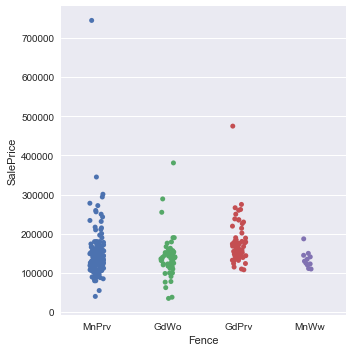

In [21]:
sns.catplot(x='Fence',y="SalePrice",data=df_train);

In [22]:
X['Fence'] = X['Fence'].fillna('NoFence')

In [23]:
null_list = []
for key,value in dict(X.isnull().sum()).items():
    if value != 0:
        print(key,value,X[key].dtype)
        null_list.append(key)

Utilities 2 object
Exterior1st 1 object
Exterior2nd 1 object
BsmtFinSF1 1 float64
BsmtFinSF2 1 float64
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
BsmtFullBath 2 float64
BsmtHalfBath 2 float64
KitchenQual 1 object
Functional 2 object
GarageCars 1 float64
GarageArea 1 float64
SaleType 1 object


In [24]:
for feature_name in null_list:
    if X[feature_name].dtype in ['O']:
        X[feature_name] = X[feature_name].fillna(X[feature_name].mode()[0])
    else:
        X[feature_name] = X[feature_name].fillna(X[feature_name].median())

In [25]:
for key,value in dict(X.isnull().sum()).items():
    if value != 0:
        print(key,value,X[key].dtype)

#### <font color='blue'> New feature
TotalBsmtSF = 'BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF'
    
Linear correlation of totalBsmtSF is much stronger than other features.

In [26]:
df_train['Total_sqr_footage'] = (df_train['TotalBsmtSF'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])

df_train[['Total_sqr_footage','TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']].corr().SalePrice

Total_sqr_footage    0.782260
TotalBsmtSF          0.613581
1stFlrSF             0.605852
2ndFlrSF             0.319334
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [27]:
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5*df_train['HalfBath']) + 
                               df_train['BsmtFullBath'] + (0.5*df_train['BsmtHalfBath']))

df_train[['Total_Bathrooms','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','SalePrice']].corr().SalePrice

Total_Bathrooms    0.631731
FullBath           0.560664
HalfBath           0.284108
BsmtFullBath       0.227122
BsmtHalfBath      -0.016844
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [28]:
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

df_train[['Total_porch_sf','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF','SalePrice']].corr().SalePrice

Total_porch_sf    0.390993
OpenPorchSF       0.315856
3SsnPorch         0.044584
EnclosedPorch    -0.128578
ScreenPorch       0.111447
WoodDeckSF        0.324413
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [29]:
X['YN2ndfloor'] = X['2ndFlrSF'].apply(lambda x: '1' if x > 0 else '0')
X['YNGarage'] = X['GarageArea'].apply(lambda x: '1' if x > 0 else '0')
X['YNFireplace'] = X['Fireplaces'].apply(lambda x: '1' if x > 0 else '0')
X['Fence'] = X['Fence'].apply(lambda x: '0' if x =='NoFence' else '1')

In [30]:
X['Total_sqr_footage'] = (X['TotalBsmtSF'] +
                          X['1stFlrSF'] + X['2ndFlrSF'])

X['Total_Bathrooms'] = (X['FullBath'] + (0.5*X['HalfBath']) + 
                        X['BsmtFullBath'] + (0.5*X['BsmtHalfBath']))

X['Total_porch_sf'] = (X['OpenPorchSF'] + X['3SsnPorch'] +
                       X['EnclosedPorch'] + X['ScreenPorch'] +
                       X['WoodDeckSF'])

### Feature classification and chage data type

In [31]:
X.shape

(2919, 85)

In [32]:
obj_feature = [key for key in dict(X.dtypes) if dict(X.dtypes)[key] in ['object']]
len(obj_feature)

46

In [33]:
num_obj_feature = ['OverallQual','FullBath','Fireplaces','GarageCars']

In [34]:
num_feature = [key for key in dict(X.dtypes) if dict(X.dtypes)[key] in ['int64','float64']]
len(num_feature)

39

In [35]:
for feature_name in num_obj_feature:
    num_feature.remove(feature_name)
len(num_feature)

35

In [36]:
feature = num_feature + num_obj_feature + obj_feature
print('Numerical features are:',len(num_feature))
print('Num_Categorical features are',len(num_obj_feature))
print('Categorical features are:',len(obj_feature))
print('Total feature is :',len(feature))

Numerical features are: 35
Num_Categorical features are 4
Categorical features are: 46
Total feature is : 85


In [37]:
# Chage data type for num_obj_features
for feature_name in num_obj_feature:
    X.update(X[feature_name].astype('str'))

## Clean Data

### Skew data

In [38]:
# Calculate the skewness for dataset
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = X[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
#skews

In [39]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]   
high_skew_name = high_skew.index            # Take the column name for skewness > 0.5

for i in high_skew_name:
    X[i] = boxcox1p(X[i],boxcox_normmax(X[i]+1))     # Use boxcox1p to reduce the skewness
    
skew_features = X[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skew2 = pd.DataFrame({'skew':skew_features})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


### Split train and test set

In [40]:
X_set = pd.get_dummies(X).reset_index(drop=True)
print(X_set.shape)

(2919, 323)


In [41]:
type(X_set)

pandas.core.frame.DataFrame

In [42]:
X_train = X_set.iloc[0:len(y),:]
X_test = X_set.iloc[len(X_train):,:]
print(X_train.shape)
print(X_test.shape)
print(y.shape)

(1460, 323)
(1459, 323)
(1460,)


In [43]:
type(X_train)

pandas.core.frame.DataFrame

#### <font color='blue'> Outlier

In [44]:
import statsmodels.api as sm
ols = sm.OLS(endog = y, exog = X_train)
fit = ols.fit()
test2 = fit.outlier_test()['bonf(p)']

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/anaconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_cor

In [45]:
outliers = list(test2[test2<1e-3].index)
outliers

[462, 523, 632, 825, 968, 1324]

In [46]:
X_train = X_train.drop(X_train.index[outliers])
y = y.drop(y.index[outliers])

#### <font color='blue'> Overfit

In [47]:
overfit = []
for i in X_train.columns:
    counts = X_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X_train) * 100 >99.94:
        overfit.append(i)
    
overfit

['Condition2_PosN', 'FullBath_4', 'Fireplaces_4', 'GarageCars_5.0']

In [48]:
X_train.drop(overfit,axis=1,inplace=True)
X_test.drop(overfit,axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

(1454, 319)
(1459, 319)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## <font color='Red'>Model Training

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

#### <font color='blue'> Define Score function

In [50]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

#### <font color='blue'> Define cross validation method

In [51]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

### <font color='red'> Linear regression Model

In [52]:
lin_reg = LinearRegression() 
benchmark_model = make_pipeline(RobustScaler(),
                                lin_reg).fit(X=X_train, y=y)
cv_rmse(benchmark_model).mean()

0.12510249233959075

#### <font color='red'> Include Ridge Method to optimize alpha

In [53]:
from sklearn.linear_model import RidgeCV

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(X_train, y)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

In [54]:
alphas = [.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)

Text(0,0.5,'score')

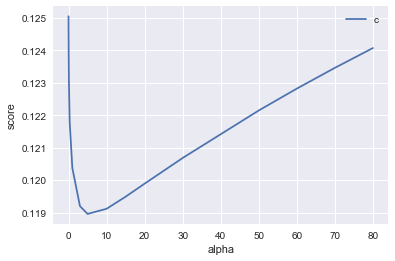

In [55]:
plt.plot(alphas, ridge_scores, label='Ridge');
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

In [56]:
alphas_rid = [5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4]
 
ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_rid,
                                    cv=kfolds)).fit(X_train, y)

cv_rmse(ridge_model2).mean()

0.11898937091969009

In [57]:
ridge_model2.steps[1][1].alpha_

5.5

#### <font color='red'> Include Lasso Method to optimize Model

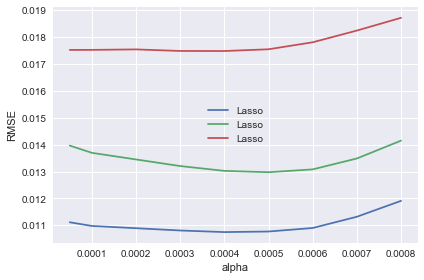

In [58]:
from sklearn.linear_model import LassoCV


alphas_Las = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]


lasso_model = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas_Las,
                                    random_state = 42)).fit(X_train, y)

scores = lasso_model.steps[1][1].mse_path_

plt.plot(alphas_Las, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [59]:
lasso_model.steps[1][1].alpha_

0.0004

In [60]:
cv_rmse(lasso_model).mean()

0.11409972772624324

#### <font color='red'> ElasticNet Method to optimize model

In [61]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model = elastic_cv.fit(X_train, y)

print(cv_rmse(elastic_model).mean())
print(elastic_model.steps[1][1].l1_ratio_)
print(elastic_model.steps[1][1].alpha_)

0.11389601581500261
1.0
0.0003


#### <font color='red'> xgb model

In [62]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [63]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_fit = xgb.fit(X_train, y)

#### <font color='red'> SVM model

In [64]:
from sklearn import svm
svr_opt = svm.SVR(C = 100000, gamma = 1e-08)

svr_fit = svr_opt.fit(X_train, y)

#### <font color='red'> LGBM model

In [65]:
# from lightgbm import LGBMRegressor

# lgbm_model = LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# lgbm_fit = lgbm_model.fit(X_train, y)

#### <font color='red'> Stack Model

In [66]:
from mlxtend.regressor import StackingCVRegressor

#setup models
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_rid, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas_Las,
                              random_state = 42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

# lightgbm = make_pipeline(RobustScaler(),
#                         LGBMRegressor(objective='regression',num_leaves=5,
#                                       learning_rate=0.05, n_estimators=720,
#                                       max_bin = 55, bagging_fraction = 0.8,
#                                       bagging_freq = 5, feature_fraction = 0.2319,
#                                       feature_fraction_seed=9, bagging_seed=9,
#                                       min_data_in_leaf =6, 
#                                       min_sum_hessian_in_leaf = 11))

xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:linear',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006))


#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost),
#                                            xgboost, lightgbm), 
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)

stackX = np.array(X_train)
stacky = np.array(y)

In [67]:
stack_gen_model = stack_gen.fit(stackX, stacky)

#### <font color='red'> Model Predictions

In [68]:
em_preds = elastic_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)
ridge_preds = ridge_model2.predict(X_test)
stack_gen_preds = stack_gen_model.predict(X_test)
xgb_preds = xgb_fit.predict(X_test)
svr_preds = svr_fit.predict(X_test)
#lgbm_preds = lgbm_fit.predict(X_test)

In [69]:
final_preds = ((0.2*em_preds) + (0.2*lasso_preds) + (0.1*ridge_preds) + 
               (0.2*xgb_preds) + (0.3*stack_gen_preds))     #+ (0.1*lgbm_preds)

In [70]:
submission = pd.read_csv("sample_submission.csv")

<font color='red'> **np.floor** </font> return the floor of the input. 下进位
<font color='red'> **np.ceil** </font> return the ceiling of the input. 上进位
<font color='red'> **np.expm1** </font> calculate the exp(x)-1 but provide greater precision than exp(x)-1
<font color='blue'>Since predicted values are log1p(SalePrice), so we need to inverse-transform it by using exp1m function. 

In [71]:
submission.iloc[:,1] = np.floor(np.expm1(final_preds))

In [72]:
submission.to_csv("final_submission.csv", index=False)